## Multi-class Dog Breed **Classification**

#1. Problem
Identifying the breed of a dog given an image of a dog.

##2. Data
The data we're using is from Kaggle's dog breed identification competition.

##3. Evaluation
The evaluation is a file with prediction probabilities for each dog breed of each test image.



##4. Features
Some information about the data:


*   We're dealing with images (unstructured data) so we will use deep learning/transfer learning.
*   There are 120 breeds of dogs (this means there are 120 different classes).
*   There are around 10,000+ images in the training set (these images have labels).
*   There are around 10,000+ images in the test set (these images have no labels, because we'll want to predict them).


In [ ]:
## !unzip drive/MyDrive/Dog_Breed_Classification/dog-breed-identification.zip -d drive/MyDrive/Dog_Breed_Classification/

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow_hub as hub
import seaborn as sns

In [ ]:
print("Tensorflow version",tf.__version__)
print("Hub version",hub.__version__)

Tensorflow version 2.17.1
Hub version 0.16.1


In [ ]:
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

GPU available


In [ ]:
label_csv=pd.read_csv("drive/MyDrive/Dog_Breed_Classification/labels.csv")

In [ ]:
label_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
#To get information of data
label_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


In [ ]:
#To check if there is any missing values
label_csv.isnull().sum()

,0
id,0
breed,0


In [ ]:
#To describe data mathematically
label_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,fff43b07992508bc822f33d8ffd902ae,scottish_deerhound
freq,1,126


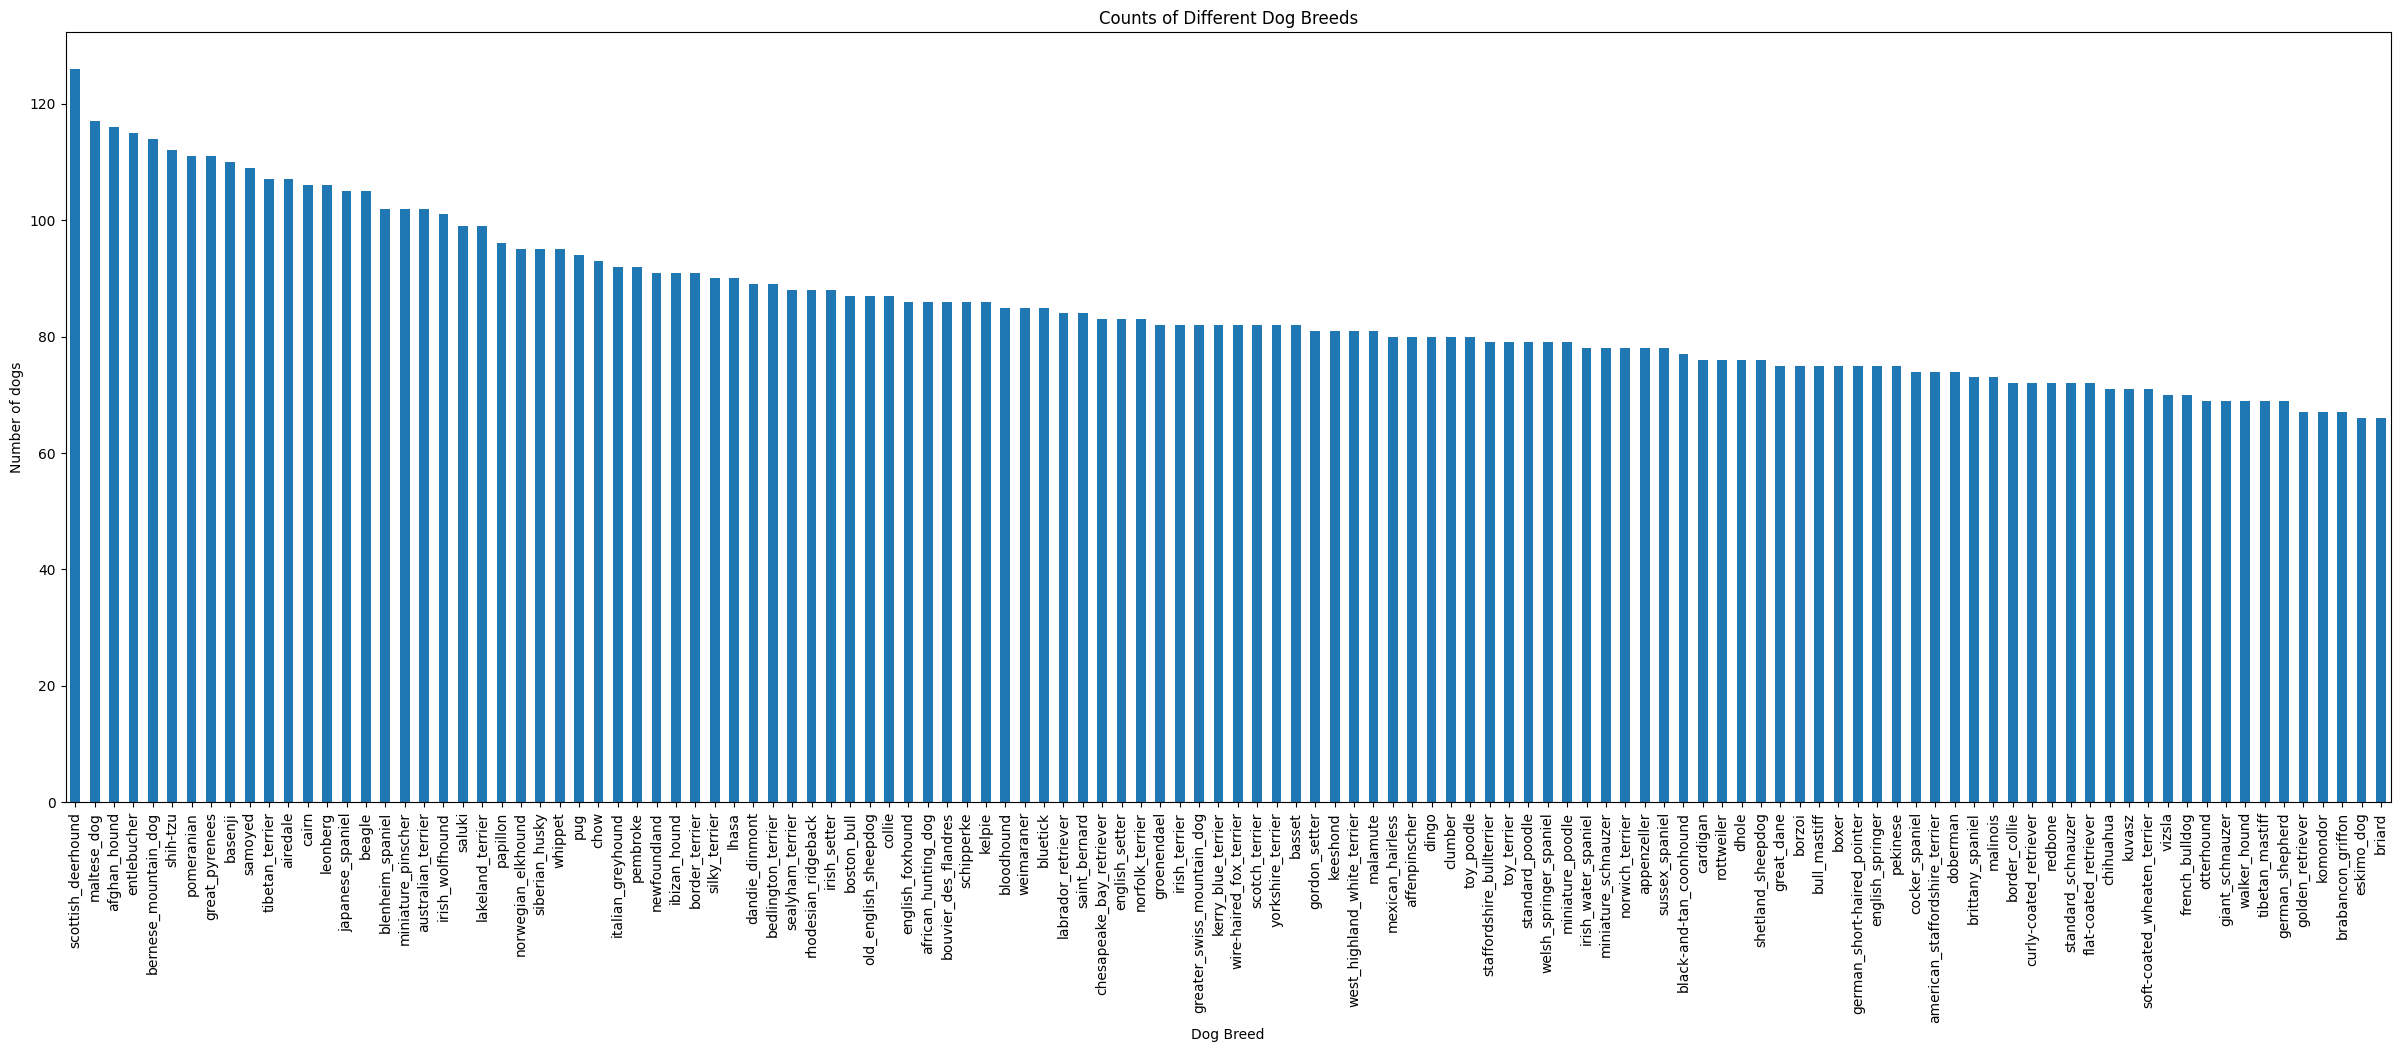

In [ ]:
breed_counts = label_csv['breed'].value_counts()

plt.figure(figsize=(30, 10))
breed_counts.plot(kind="bar")
plt.title('Counts of Different Dog Breeds')
plt.xlabel('Dog Breed')
plt.ylabel('Number of dogs')
plt.show()

In [ ]:
breed_counts.median()

82.0

##Getting Images and their labels

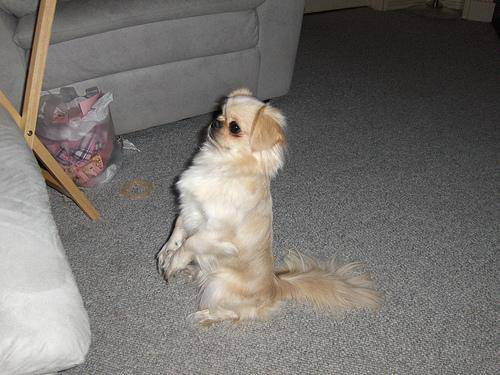

In [ ]:
#Lets view one image
from IPython.display import Image
Image("drive/MyDrive/Dog_Breed_Classification/train/001cdf01b096e06d78e9e5112d419397.jpg")


In [ ]:
# Create pathnames from image ID's
filenames=["drive/MyDrive/Dog_Breed_Classification/train/"+fname+".jpg"for fname in label_csv["id"]]
filenames

['drive/MyDrive/Dog_Breed_Classification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog_Breed_Classification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog_Breed_Classification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog_Breed_Classification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog_Breed_Classification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog_Breed_Classification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog_Breed_Classification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog_Breed_Classification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog_Breed_Classification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog_Breed_Classification/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 'drive/MyDrive/Dog_Breed_Classification/train/004396df1acd0f1247b740ca2b14616e.jpg',
 'drive/MyDrive/Dog_Breed_Classification/train/0067dc3

In [ ]:
import os
if len(os.listdir("drive/MyDrive/Dog_Breed_Classification/train"))==len(filenames):
  print("All images are present")
else:
  print("Not all images are present")

All images are present


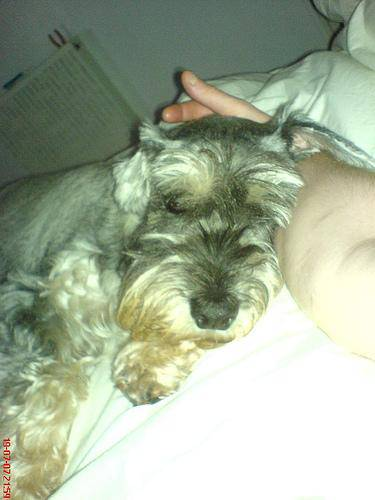

In [ ]:
label_csv["breed"][26]
Image(filenames[26])

In [ ]:
label_csv["breed"][26]

'standard_schnauzer'

In [ ]:
labels=label_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
#Checking if number of labels and filenames are same
if len(labels)==len(filenames):
  print("Number of labels and filenames are same")
else:
  print("Number of labels and filenames are not same")

Number of labels and filenames are same


In [ ]:
unique_labels=np.unique(labels)
len(unique_labels)

120

In [ ]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_labels

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Turn every label into a boolean array
boolean_labels = [label == unique_labels for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
# Example: Turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_labels == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
y=boolean_labels

In [ ]:
y

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

##Creating our validation set

In [ ]:
X=filenames
y=boolean_labels

In [ ]:
X[:2]


['drive/MyDrive/Dog_Breed_Classification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog_Breed_Classification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg']

In [ ]:
y[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
# We're going to start off experimenting with ~1000 images and increase as needed.
NUM_IMAGES=1000 #@param{type:"slider",min:1000,max:10000,step:100}

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_val,y_train,y_val=train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2,random_state=23)

In [ ]:
len(X_train),len(X_val),len(y_train),len(y_val)

(800, 200, 800, 200)

#Pre-Processing Images(Converting images to tensors)
To preprocess our images into Tensors I am  going to write a function which does a few things:

1.   Take an image filepath as input
2.   Use TensorFlow to read the file and save it to a variable, image
3. Turn our image (a jpg) into Tensors
4. Normalize our image (convert color channel values from from 0-255 to 0-1).
5. Resize the image to be a shape of (224, 224)
6. Return the modified image





In [ ]:
#Initially lets see how we import images
from matplotlib.pyplot import imread
Image=imread(filenames[2])

In [ ]:
Image.shape

(375, 500, 3)

In [ ]:
Image[:2]

array([[[ 97,  96,  91],
        [102, 101,  96],
        [108, 107, 102],
        ...,
        [ 10,  12,  11],
        [ 10,  12,  11],
        [ 10,  12,  11]],

       [[ 99,  98,  93],
        [102, 101,  96],
        [108, 107, 102],
        ...,
        [ 18,  20,  19],
        [ 18,  20,  19],
        [ 18,  20,  19]]], dtype=uint8)

In [ ]:
tf.constant(Image)[:2]

<tf.Tensor: shape=(2, 500, 3), dtype=uint8, numpy=
array([[[ 97,  96,  91],
        [102, 101,  96],
        [108, 107, 102],
        ...,
        [ 10,  12,  11],
        [ 10,  12,  11],
        [ 10,  12,  11]],

       [[ 99,  98,  93],
        [102, 101,  96],
        [108, 107, 102],
        ...,
        [ 18,  20,  19],
        [ 18,  20,  19],
        [ 18,  20,  19]]], dtype=uint8)>

In [ ]:
#Function to Preprocess our images
IMG_SIZE=224
def process_image(image_path):
  #Using TensorFlow to read the file and save it to a variable, image
  image=tf.io.read_file(image_path)
  #Turn our image (a jpg) into Tensors
  image=tf.image.decode_jpeg(image,channels=3)
  #Resize the image to be a shape of (224, 224)
  image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])
  #Normalize our image (convert color channel values from from 0-255 to 0-1).
  image=image/255.
  return image




In [ ]:
process_image(filenames[69])

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[1.44335851e-02, 1.83551535e-02, 3.20331263e-03],
        [1.37881711e-02, 1.77097395e-02, 3.38901114e-03],
        [2.08912752e-04, 4.13048128e-03, 0.00000000e+00],
        ...,
        [1.17647061e-02, 1.17647061e-02, 1.17647061e-02],
        [1.82860643e-02, 1.82860643e-02, 1.82860643e-02],
        [1.82860643e-02, 1.82860643e-02, 1.82860643e-02]],

       [[1.20994570e-02, 1.60210263e-02, 2.04762234e-03],
        [7.37413357e-04, 4.65898169e-03, 5.18573157e-04],
        [1.90108884e-02, 2.29324568e-02, 6.49486436e-04],
        ...,
        [1.21200662e-02, 1.21200662e-02, 1.21200662e-02],
        [1.17209377e-02, 1.17209377e-02, 1.17209377e-02],
        [1.17209377e-02, 1.17209377e-02, 1.17209377e-02]],

       [[1.10203683e-01, 1.08750619e-01, 8.79085287e-02],
        [1.20225832e-01, 1.18772753e-01, 9.79306698e-02],
        [1.13384187e-01, 1.11931100e-01, 9.10890177e-02],
        ...,
        [1.59022082e-02, 1.59022

## Turning our data into batches

In [ ]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the assosciated label,
  processes the image and reutrns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [ ]:
(process_image(X[21]),tf.constant(y[21]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.32450607, 0.38725117, 0.34411392],
         [0.32949927, 0.39224437, 0.34910712],
         [0.30567226, 0.37510502, 0.32862392],
         ...,
         [0.15686275, 0.15294118, 0.17254902],
         [0.15686275, 0.15294118, 0.17254902],
         [0.15686275, 0.15294118, 0.17254902]],
 
        [[0.29259455, 0.35533965, 0.3122024 ],
         [0.30793193, 0.37067702, 0.32753977],
         [0.2798957 , 0.34932846, 0.3028474 ],
         ...,
         [0.15686275, 0.15294118, 0.17254902],
         [0.15686275, 0.15294118, 0.17254902],
         [0.15686275, 0.15294118, 0.17254902]],
 
        [[0.25292364, 0.31566873, 0.27253148],
         [0.280077  , 0.3428221 , 0.29968485],
         [0.24635853, 0.31579128, 0.2693102 ],
         ...,
         [0.15686275, 0.15294118, 0.17254902],
         [0.15686275, 0.15294118, 0.17254902],
         [0.15686275, 0.15294118, 0.17254902]],
 
        ...,
 
        [[0.13556606, 0.335566  

In [ ]:
BATCH_SIZE=32

def create_data_batches(X,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
  if test_data:
    print("Creating test data batches")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch=data.map(process_image).batch(batch_size)
    return data_batch
    #If valid_data=True
  elif valid_data:
    print("Creating validation data batches")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
    data=data.map(get_image_label)
    data_batch=data.batch(batch_size)
    return data_batch
  else:
    print("Creating training data batches")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches
Creating validation data batches


In [ ]:
train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

##Visualizing Data Batches

In [ ]:
import matplotlib.pyplot as plt

#Creating a function to show a 25 images
def show_25_images(images,labels):
  plt.figure(figsize=(10,10))
  for i in range(25):
    ax=plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.axis("off")
    plt.title(unique_labels[labels[i].argmax()])



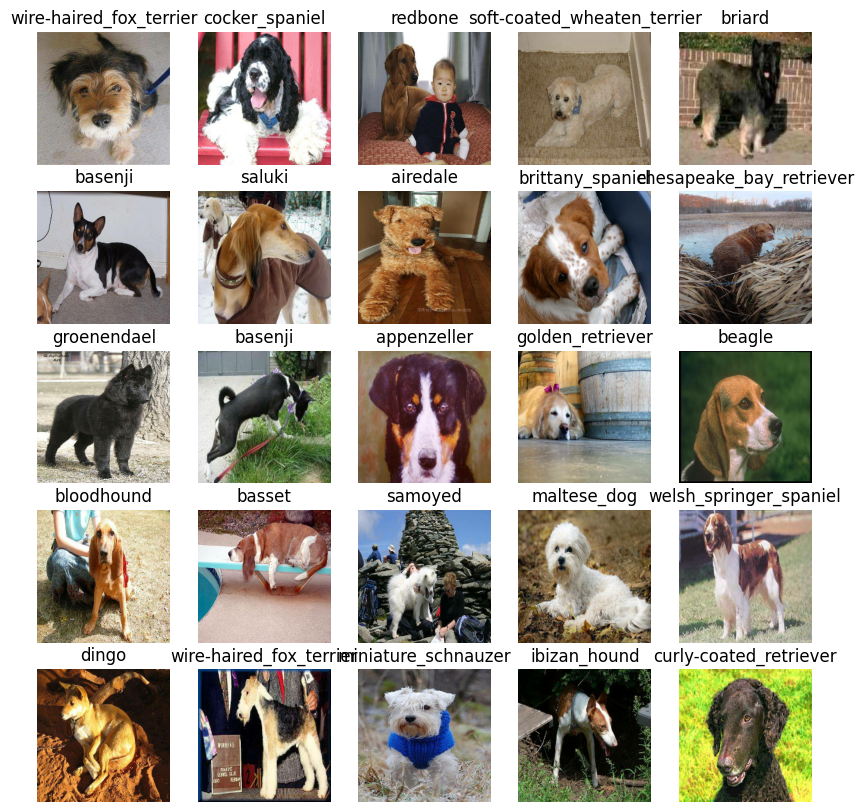

In [ ]:
# Visualize training images from the training data batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

##Building a Model



In [ ]:
#Setup input shape to model
INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3]

#Setup output shape to model
OUTPUT_SHAPE=len(unique_labels)

#Setup model url from tensorhub
MODEL_URL="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"


In [ ]:
#Function to build model
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
  print("Building Model with",MODEL_URL)

model=tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL),
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,activation="softmax")
])

model.compile(
    loss=tf.keras.losses.CategoricalCrossEntropy()
    optimizer=tf.keras.optimizers.Adam()
    metrics=["accuracy"]
model.build(INPUT_SHAPE)
return model
)

SyntaxError: unmatched ')' (<ipython-input-49-4af500821463>, line 16)

In [ ]:
model=create_model()
model.s